   <img src = "https://drive.google.com/uc?id=1JCGXq-eLDEqIh-MIeEEs7VLfde6GFP2q" width = 240/>


# Controle e Acesso de Dados

##Autor

Victor Fernandes Dell Elba Gomes

Grupo de Preparação de Dados


---



## Introdução
A limpeza de dados é um processo essencial na ciência de dados que consiste em identificar, corrigir e remover erros, inconsistências e dados irrelevantes ou duplicados em conjuntos de dados. Essa etapa é crucial para garantir a qualidade e a integridade dos dados utilizados em análises e modelagens, permitindo que os insights e resultados obtidos sejam confiáveis e precisos.

#Importância da Limpeza de Dados na área de Dados

A limpeza de dados é a base para qualquer projeto de ciência de dados, influenciando diretamente a qualidade das conclusões e a tomada de decisões informadas.
Dados sujos ou não tratados podem levar a análises enviesadas, imprecisas e resultados enganosos, prejudicando a credibilidade de todo o projeto.
A confiabilidade dos algoritmos de aprendizado de máquina e modelos preditivos depende da qualidade dos dados utilizados em seu treinamento.

#Desafios comuns na Qualidade dos Dados

*   Ruído nos dados
*   Valores ausentes
*   Inconsistências
*   Erros de digitação
*   Duplicações

#Etapas do Processo de Limpeza de Dados

*   Compreensão da estrutura dos dados
*   Identificação de problemas potenciais
*   Inconsistências
*   Tratamento de Valores Ausentes
*   Detecção e Tratamento de Outliers
*   Padronização e Normalização
*   Erros de Digitação e Dados Inconsistentes
*   Remoção de Duplicatas

##Compreensão da estrutura dos dados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("mass_shootings_us.csv", encoding="Latin1")

In [ ]:
df.head(10)

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN
5,6,Fresno downtown shooting,"Fresno, California",4/18/2017,"Kori Ali Muhammad, 39, opened fire along a str...",3,0,3,Unclear,Black,M,NaN,NaN
6,7,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",1/6/2017,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11,Yes,Latino,M,NaN,NaN
7,8,Cascade Mall shooting,"Burlington, WA",9/23/2016,"Arcan Cetin, 20, killed a teen girl and three ...",5,0,5,Yes,NaN,M,NaN,NaN
8,9,Baton Rouge police shooting,"Baton Rouge, LA",7/17/2016,"Gavin Long, a former Marine who served in Iraq...",3,3,6,Yes,Black,M,NaN,NaN
9,10,Dallas police shooting,"Dallas, Texas",7/7/2016,"Micah Xavier Johnson, a 25-year-old Army veter...",5,11,16,Unclear,Black,M,NaN,NaN


In [ ]:
df.describe()

,S#,Fatalities,Injured,Total victims,Latitude,Longitude
count,320.000000,320.000000,320.0000,320.000000,303.000000,303.000000
mean,160.500000,4.375000,6.1625,10.187500,37.225076,-94.429539
std,92.520268,5.652142,30.0169,33.757607,5.536365,16.513296
min,1.000000,0.000000,0.0000,3.000000,21.325512,-161.792752
25%,80.750000,1.000000,1.0000,4.000000,33.571459,-110.205485
50%,160.500000,3.000000,3.0000,5.000000,36.443290,-88.122998
75%,240.250000,5.250000,5.0000,9.000000,41.483844,-81.703237
max,320.000000,58.000000,527.0000,585.000000,60.790539,-69.707823


##Verificação dos Tipos de Dados:

In [ ]:
print(df.dtypes)

S#                        int64
Title                    object
Location                 object
Date                     object
Summary                  object
Fatalities                int64
Injured                   int64
Total victims             int64
Mental Health Issues     object
Race                     object
Gender                   object
Latitude                float64
Longitude               float64
dtype: object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.dtypes)

S#                               int64
Title                           object
Location                        object
Date                    datetime64[ns]
Summary                         object
Fatalities                       int64
Injured                          int64
Total victims                    int64
Mental Health Issues            object
Race                            object
Gender                          object
Latitude                       float64
Longitude                      float64
dtype: object


##Detecção de Valores Ausentes:

In [ ]:
print(df.isnull().sum())

S#                       0
Title                    0
Location                45
Date                     0
Summary                  1
Fatalities               0
Injured                  0
Total victims            0
Mental Health Issues     0
Race                     2
Gender                   0
Latitude                17
Longitude               17
dtype: int64


##Tratamento de Valores Ausentes:

In [ ]:
#Optar por fillna
df['Location'].fillna('Unknown', inplace=True)

In [ ]:
# Preencher valores ausentes em "Location" com base em informações da coluna "City" ou utilizar api geográfica para triangular pelas coordenadas Lat e Long
df['Location'].fillna(df['City'], inplace=True)

In [ ]:
# Preencher valores ausentes em "Location" com a cidade mais frequente
most_frequent_city = df['Location'].mode()[0]
df['Location'].fillna(most_frequent_city, inplace=True)

In [ ]:
# Preencher valores ausentes em "Location" usando bfill
df['Location'].fillna(method='bfill', inplace=True)

In [ ]:
# Preencher valores ausentes em "Location" usando ffill
df['Location'].fillna(method='ffill', inplace=True)

##Análise de Outliers:

Para análise de outliers, geralmente são identificados em variáveis numéricas, pois são valores extremos que se diferenciam significativamente dos demais, então escolher uma coluna com dados numéricos.

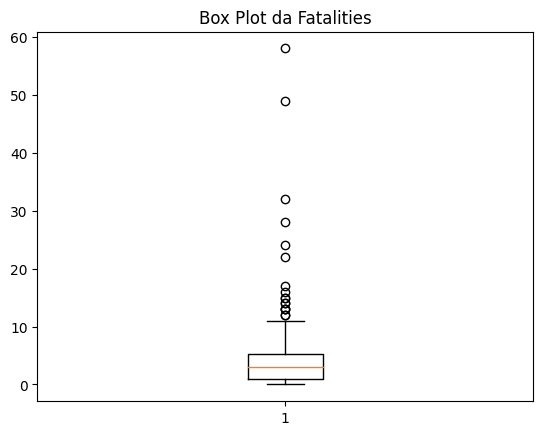

In [ ]:
plt.boxplot(df['Fatalities'])
plt.title('Box Plot da Fatalities')
plt.show()

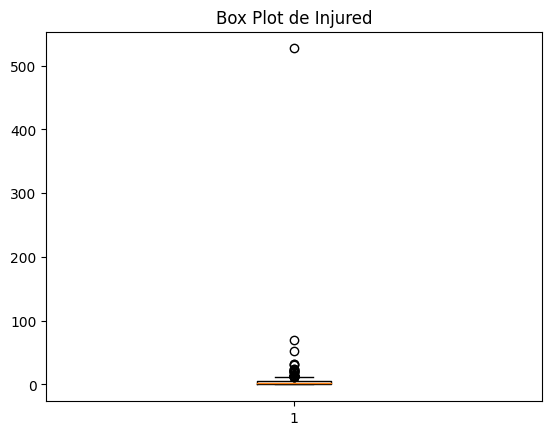

In [ ]:
plt.boxplot(df['Injured'])
plt.title('Box Plot de Injured')
plt.show()

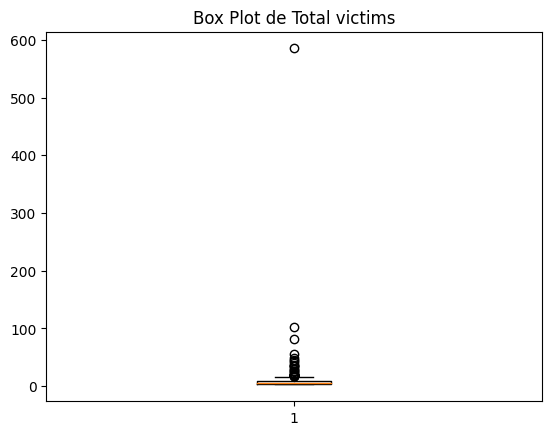

In [ ]:
plt.boxplot(df['Total victims'])
plt.title('Box Plot de Total victims')
plt.show()

##Exploração de Relações entre Variáveis:

<ipython-input-18-833d8027c185>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


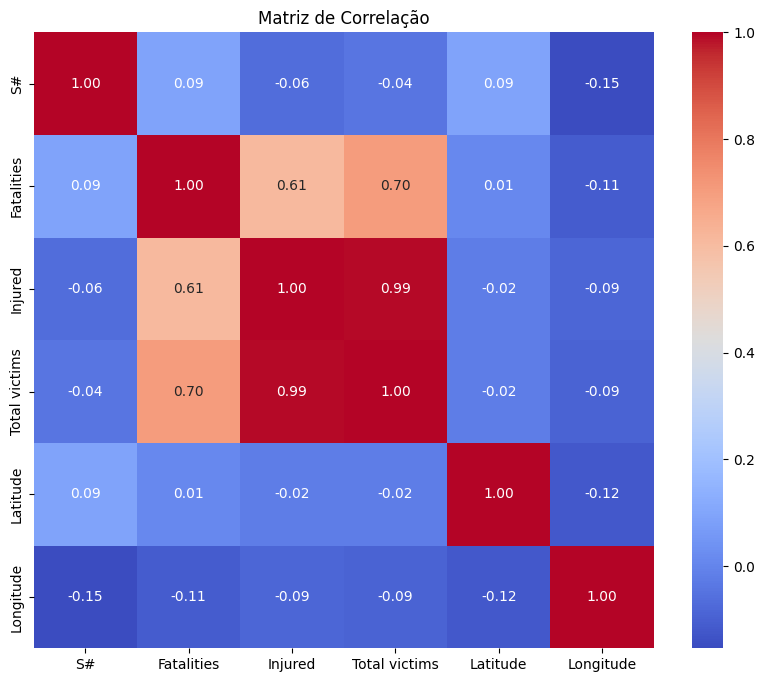

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

##Identificação de Duplicatas:

In [ ]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [S#, Title, Location, Date, Summary, Fatalities, Injured, Total victims, Mental Health Issues, Race, Gender, Latitude, Longitude]
Index: []


##Dados Irrelevantes:

Informações que não são relevantes para a análise ou não estão alinhadas com os objetivos do estudo, como campos preenchidos erroneamente ou informações não relacionadas.

In [ ]:
df = df.drop(columns=['Latitude'])

In [ ]:
df = df.drop(columns=['S#'])

##Inconsistência dos dados:

In [ ]:
erro = df['Total victims'] != (df['Fatalities'] + df['Injured'])

# Aplicar a máscara no DataFrame para mostrar apenas as linhas que atendem à condição
result = df[erro]

In [ ]:
result

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
17,18,Alabama highway random shooting,NaN,4/19/2016,Shooter fired from his car at two different lo...,1,4,4,Yes,White American or European American,Male,34.162040,-86.475543
18,19,Long Beach Street murder,NaN,4/18/2016,Group of men were standing at a street corner ...,0,3,4,Unknown,Unknown,Unknown,33.770050,-118.193739
22,23,"Albuquerque, NM Family restaurant shooting",NaN,4/1/2016,The shooter killed two of his nephews at the r...,3,1,3,Unknown,Asian American,Male,35.085334,-106.605553
23,24,"Richmond, Virginia","Richmond, Virginia",3/31/2016,A man fatally shot a Virginia state trooper at...,2,2,3,Unknown,Black American or African American,Male,37.540725,-77.436048
25,26,"Lawrenceburg, Tennessee","Lawrenceburg, Tennessee",3/25/2016,The man was suspected of shooting his wife and...,2,2,3,Unknown,Unknown,Male,35.242302,-87.334739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,49th Street Elementary School,"Los Angeles, California",2/24/1984,"On February 24, a 28-year-old man began shooti...",3,12,14,Yes,Black American or African American,Male,34.176221,-118.539954
308,309,Welding shop in Miami,"Miami, Florida",8/20/1982,"On August 20, 1982, a 51-year-old teacher on p...",9,3,11,Yes,White American or European American,Male,25.796539,-80.208404
316,317,New Orleans Police Shootings,"New Orleans, Louisiana",12/31/1972,"On New Year's Eve in 1972, a 23-year-old ex-Na...",10,13,22,Yes,Black American or African American,Male,30.068724,-89.931474
317,318,St. Aloysius Church,"Spokane, Washington",11/11/1971,"On November 11, 1971, a former MIT student ent...",2,4,5,Yes,White American or European American,Male,47.673674,-117.415984


In [ ]:
df['Total victims'] = df['Fatalities'] + df['Injured']

##Normalização dos dados:

Tornar os dados consistentes e comparáveis

In [ ]:
print(df['Gender'].unique())

['M' 'Unknown' 'Male' 'M/F' 'Male/Female' 'Female']


In [ ]:
print(df['Gender'].value_counts())

Male           272
Unknown         21
M               17
Female           5
Male/Female      4
M/F              1
Name: Gender, dtype: int64


In [ ]:
df['Gender'].replace({'M': 'Male', 'F': 'Female', 'M/F': 'Male/Female', '': 'Unknown'}, inplace=True)

In [ ]:
print(df['Gender'].unique())

['Male' 'Unknown' 'Male/Female' 'Female']


In [ ]:
print(df['Gender'].value_counts())

Male           289
Unknown         21
Male/Female      5
Female           5
Name: Gender, dtype: int64


##Boas Práticas para Limpeza de Dados


**Documentar o Processo de Limpeza:**

Mantenha um registro detalhado das etapas de limpeza de dados realizadas, incluindo as decisões tomadas, os valores substituídos, as colunas removidas, etc. Isso tornará o processo mais transparente e replicável, facilitando o compartilhamento com outros colaboradores ou futuras análises.

**Lidar com Valores Ausentes Adequadamente:**

Trate valores ausentes de forma apropriada, preenchendo-os com valores padrão, estimando-os com base em outras informações ou eliminando as linhas que os contenham. A decisão sobre como tratar valores ausentes deve ser tomada com base no contexto e no impacto que eles podem ter na análise.

**Padronização de Unidades de Medida:**

Verifique se as unidades de medida estão consistentes em todo o dataset. Padronize todas as unidades para evitar discrepâncias nos cálculos e comparações.

**Verificação de Consistência Lógica**:
Realize verificações de consistência lógica para identificar dados que não fazem sentido ou são improváveis. Por exemplo, verifique se as idades são valores razoáveis para o contexto, se as datas estão dentro de um intervalo aceitável ou se os valores estão dentro de limites conhecidos.

**Tratamento de Erros de Digitação:**

Identifique e corrija erros de digitação ou valores que possam ter sido inseridos incorretamente. Use técnicas de correção de texto, como a verificação ortográfica, para encontrar e corrigir erros comuns.

##Conclusão

Nesta aula, exploramos os principais conceitos e boas práticas envolvidos na limpeza de dados, destacando sua importância para garantir a qualidade e a confiabilidade dos resultados obtidos em nossas análises.

##Referências:

https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45

https://www.kaggle.com/code/ridamahmood005/mass-shooting-insights-by-rmd

##Aprofundamento:

https://www.dataquest.io/course/python-data-cleaning-advanced/

https://www.coursera.org/learn/data-cleaning